In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
os.getcwd()

'/Users/ritvikseth/Desktop/Crypto-Analysis'

In [3]:
coins = os.listdir('./dataset/coins')

def map_filename2coin_name(coin_list, basedir='./'):
    res = {}
    for filename in coin_list:
        name = filename.split('_')[-1]
        name = name.split('.')[0]
        res[name] = os.path.join(basedir, filename)
    
    return res

In [4]:
coin2fname_mapping = map_filename2coin_name(coins, 'dataset/coins')
coin2fname_mapping

{'NEM': 'dataset/coins/coin_NEM.csv',
 'EOS': 'dataset/coins/coin_EOS.csv',
 'Monero': 'dataset/coins/coin_Monero.csv',
 'Polkadot': 'dataset/coins/coin_Polkadot.csv',
 'USDCoin': 'dataset/coins/coin_USDCoin.csv',
 'Uniswap': 'dataset/coins/coin_Uniswap.csv',
 'BinanceCoin': 'dataset/coins/coin_BinanceCoin.csv',
 'Iota': 'dataset/coins/coin_Iota.csv',
 'Aave': 'dataset/coins/coin_Aave.csv',
 'Solana': 'dataset/coins/coin_Solana.csv',
 'Bitcoin': 'dataset/coins/coin_Bitcoin.csv',
 'Cardano': 'dataset/coins/coin_Cardano.csv',
 'Tether': 'dataset/coins/coin_Tether.csv',
 'Cosmos': 'dataset/coins/coin_Cosmos.csv',
 'ChainLink': 'dataset/coins/coin_ChainLink.csv',
 'Litecoin': 'dataset/coins/coin_Litecoin.csv',
 'XRP': 'dataset/coins/coin_XRP.csv',
 'Ethereum': 'dataset/coins/coin_Ethereum.csv',
 'Tron': 'dataset/coins/coin_Tron.csv',
 'Stellar': 'dataset/coins/coin_Stellar.csv',
 'CryptocomCoin': 'dataset/coins/coin_CryptocomCoin.csv',
 'Dogecoin': 'dataset/coins/coin_Dogecoin.csv',
 'Wrap

In [5]:
coin2df_mapping = {key: pd.read_csv(coin2fname_mapping[key]) for key in coin2fname_mapping}

In [6]:
# display null value count for each coin
for coin in coin2df_mapping:
    df = coin2df_mapping[coin]
    na_count = df.isna().sum().sum()
    print(f'coin {coin} has {na_count} nan value(s)')

coin NEM has 0 nan value(s)
coin EOS has 0 nan value(s)
coin Monero has 0 nan value(s)
coin Polkadot has 0 nan value(s)
coin USDCoin has 0 nan value(s)
coin Uniswap has 0 nan value(s)
coin BinanceCoin has 0 nan value(s)
coin Iota has 0 nan value(s)
coin Aave has 0 nan value(s)
coin Solana has 0 nan value(s)
coin Bitcoin has 0 nan value(s)
coin Cardano has 0 nan value(s)
coin Tether has 0 nan value(s)
coin Cosmos has 0 nan value(s)
coin ChainLink has 0 nan value(s)
coin Litecoin has 0 nan value(s)
coin XRP has 0 nan value(s)
coin Ethereum has 0 nan value(s)
coin Tron has 0 nan value(s)
coin Stellar has 0 nan value(s)
coin CryptocomCoin has 0 nan value(s)
coin Dogecoin has 0 nan value(s)
coin WrappedBitcoin has 0 nan value(s)


In [7]:
# inspect types of each column
coin2df_mapping['Bitcoin'].dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [8]:
# convert Date field to Date time
for coin, df in coin2df_mapping.items():
    df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# verify
coin2df_mapping['Bitcoin'].dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [10]:
date_2013 = pd.Timestamp(year=2013, month=1, day=1, hour=0, minute=0, second=0)
date_2013

Timestamp('2013-01-01 00:00:00')

In [11]:
date_2013 + pd.offsets.YearBegin(1)

Timestamp('2014-01-01 00:00:00')

In [12]:
# get max start time of a coin
max_start_time = None
min_end_time = None
for coin, df in coin2df_mapping.items():
    if min_end_time == None:
        min_end_time = df['Date'].max()
    else:
        min_end_time = df['Date'].max() if df['Date'].max() < min_end_time else min_end_time

    if max_start_time == None:
        max_start_time = df['Date'].min()
    else:
        max_start_time = df['Date'].min() if df["Date"].min() > max_start_time else max_start_time

print(max_start_time)
print(min_end_time)

2020-10-05 23:59:59
2021-07-06 23:59:59


In [13]:
df_bitcoin = coin2df_mapping['Bitcoin']
rows_between_count = df_bitcoin[(df_bitcoin['Date'] >= max_start_time) & (df_bitcoin['Date'] <= min_end_time)]['Date'].count()
num_coins = len(coin2df_mapping)
print(rows_between_count)
print(num_coins)

275
23


In [14]:
close_matrix = np.zeros((rows_between_count, num_coins))

In [15]:
i = 0
for coin, df in coin2df_mapping.items():
    close_matrix[:, i] = df[(df['Date'] >= max_start_time) & (df['Date'] <= min_end_time)]['Close'].to_numpy()

    i += 1

In [16]:
df_close = pd.DataFrame(close_matrix, columns=coin2df_mapping.keys())

In [17]:
df_close.describe()

,NEM,EOS,Monero,Polkadot,USDCoin,Uniswap,BinanceCoin,Iota,Aave,Solana,...,Cosmos,ChainLink,Litecoin,XRP,Ethereum,Tron,Stellar,CryptocomCoin,Dogecoin,WrappedBitcoin
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.268314,4.284061,211.462947,20.317181,1.000257,17.847297,212.528454,0.925041,255.525845,16.175296,...,12.744158,23.087315,158.003282,0.637544,1572.953254,0.058131,0.315209,0.121547,0.123048,36439.175411
std,0.146423,2.016528,88.923196,13.631813,0.000817,12.770496,194.616781,0.643586,161.649917,15.607683,...,7.217069,10.170485,75.600852,0.403036,929.928946,0.036447,0.169550,0.054247,0.161442,15877.924233
min,0.093415,2.304887,106.665996,3.756162,0.997912,1.930119,26.857049,0.236193,27.715084,1.205692,...,4.377698,8.779272,45.985530,0.211828,340.815845,0.024196,0.072301,0.055438,0.002517,10612.537839
25%,0.154614,2.753289,135.707015,5.202281,0.999981,3.729487,31.031634,0.309371,81.100120,2.147115,...,5.464213,13.079648,88.947913,0.290514,602.903369,0.028929,0.165768,0.071177,0.003529,19405.975181
50%,0.233393,3.695488,204.104497,18.598199,1.000089,19.533858,209.574404,0.828754,295.089229,10.002664,...,11.937148,23.100679,155.714742,0.532433,1660.909542,0.049082,0.317561,0.112455,0.052122,35999.614656
75%,0.364522,5.121125,259.296855,34.049126,1.000308,28.685121,339.546336,1.347450,382.579255,31.083148,...,19.438310,30.032602,200.527084,0.844944,2218.870045,0.072402,0.419460,0.159475,0.252663,51269.710838
max,0.795270,14.365542,483.583612,47.945940,1.010496,43.164506,675.684077,2.532250,632.266488,55.910960,...,29.435150,52.198697,386.450779,1.839236,4168.701049,0.164650,0.729996,0.246848,0.684777,63436.579780


In [18]:
# get correlations between Close values of each coin
corr = df_close.corr()
corr

,NEM,EOS,Monero,Polkadot,USDCoin,Uniswap,BinanceCoin,Iota,Aave,Solana,...,Cosmos,ChainLink,Litecoin,XRP,Ethereum,Tron,Stellar,CryptocomCoin,Dogecoin,WrappedBitcoin
NEM,1.000000,0.338711,0.418272,0.739647,0.087308,0.607850,0.385789,0.598577,0.631754,0.155631,...,0.706642,0.612177,0.600152,0.263102,0.352414,0.374098,0.648752,0.546002,0.038036,0.739884
EOS,0.338711,1.000000,0.905014,0.749016,0.148717,0.797693,0.887888,0.850288,0.737519,0.804380,...,0.797593,0.871996,0.870553,0.888301,0.883859,0.904968,0.849108,0.595917,0.827508,0.655496
Monero,0.418272,0.905014,1.000000,0.813679,0.151175,0.891543,0.968203,0.931187,0.778800,0.879904,...,0.862798,0.902751,0.914084,0.899547,0.909963,0.936398,0.865225,0.675782,0.832536,0.767967
Polkadot,0.739647,0.749016,0.813679,1.000000,0.218871,0.950621,0.824392,0.935791,0.915372,0.664240,...,0.968965,0.927768,0.900418,0.665138,0.809260,0.801640,0.931848,0.812154,0.522508,0.951775
USDCoin,0.087308,0.148717,0.151175,0.218871,1.000000,0.175798,0.187498,0.236681,0.104429,0.122630,...,0.196557,0.136329,0.121347,0.167273,0.092275,0.259095,0.135545,0.353290,0.056970,0.171873
Uniswap,0.607850,0.797693,0.891543,0.950621,0.175798,1.000000,0.911586,0.949628,0.926131,0.803645,...,0.945812,0.941027,0.906218,0.765900,0.898070,0.856098,0.918157,0.785184,0.686385,0.905515
BinanceCoin,0.385789,0.887888,0.968203,0.824392,0.187498,0.911586,1.000000,0.936230,0.774158,0.930666,...,0.852109,0.873177,0.869839,0.907401,0.918080,0.952089,0.842021,0.734016,0.841274,0.758092
Iota,0.598577,0.850288,0.931187,0.935791,0.236681,0.949628,0.936230,1.000000,0.849441,0.786275,...,0.955926,0.933415,0.918974,0.837296,0.848977,0.931323,0.917220,0.832997,0.668970,0.885749
Aave,0.631754,0.737519,0.778800,0.915372,0.104429,0.926131,0.774158,0.849441,1.000000,0.696014,...,0.907634,0.919572,0.873241,0.660443,0.868677,0.731030,0.932411,0.606600,0.609485,0.877760
Solana,0.155631,0.804380,0.879904,0.664240,0.122630,0.803645,0.930666,0.786275,0.696014,1.000000,...,0.688784,0.731730,0.730085,0.844072,0.914941,0.845769,0.712762,0.550530,0.917516,0.591071


<AxesSubplot: >

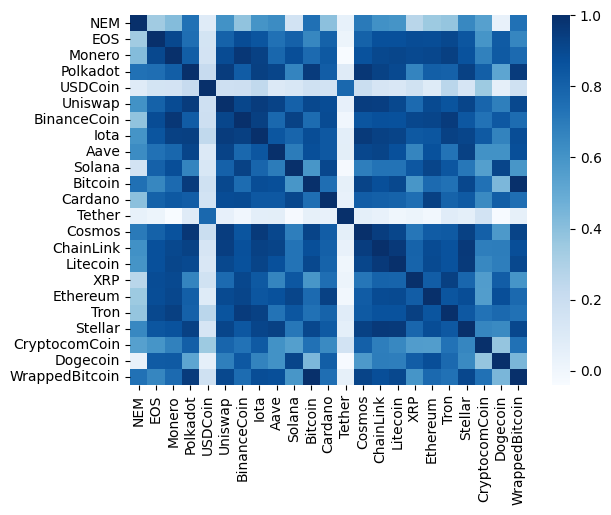

In [19]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues')

In [20]:
corr_cared = corr[['Bitcoin', 'Ethereum']]

<AxesSubplot: >

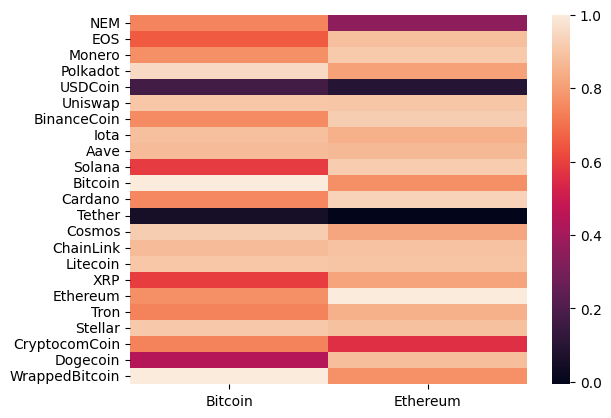

In [21]:
sns.heatmap(corr_cared)

#### Conclusion
As we know, most of the coins' prices are highly related to mainly Bitcoin or Ethereum. Here we can see some strange correlations, that is most of the coins here are related to Ethereum or Bitcoin(We say those two coins are native coins), however, some coins seem like platform specified, and their prices of them are leaning toward one of the two platforms(Ethereum, Bitcoin). e.g. Dogecoin, Solana and EOS prices are highly correlated with Ethereum and less correlated with Bitcoin while NEM and CryptocomCoin prices are highly correlated with Bitcoin and less correlated with Ethereum.

Also, we see two coins(Tether, USDCoin)' prices are not related to any coin in the list, and apparently, those two coins are the coin we said fiat currency, which value always equals 1 USD(roughly 1 USD, actually in many situations, the price of it will be like 0.999 or 1.001).